In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
from pandas.api.types import CategoricalDtype
%matplotlib inline
import umap

In [46]:
DATA_FILE = "data/Farmers_edited data 21.12.2020_IPS_FINAL- WEKA_JM.xlsx"

In [47]:
# Create dataframe
df = pd.read_excel(DATA_FILE, header=0, engine='openpyxl', na_values=['?'], usecols=range(81), 
                   skiprows=[i for i in range(150,155)])

In [48]:
# Show data size
df.shape

(149, 81)

In [50]:
# pd.set_option("max_columns", None)

In [49]:
df

,Region,Country,Subject,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to7,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,DSS_for_ShortLongTermBothDecision_Cat_NO,Prefered_type_Web_1,Prefered_type_Software_2,Prefered_type_Web_Software_Both_Cat_NO,Importance_of_easy_to_use_1to7,Importance_of_easy_to_use_1to2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to7,Importance_of_efficient_1to2,Importance_of_efficient_1to3,Importance_low_price_1to7,Importance_low_price_1to2,Importance_low_price_1to3,Importance_polyvalence_1to7,Importance_polyvalence_1to2,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to7,Enjoy_using_new_techs_1to2,Enjoy_using_new_techs_1to3,Appreciate_change_1to7,Appreciate_change_1to2,Appreciate_change_1to3,Trust_in_DSS_1to7,Trust_in_DSS_1to2,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to7,Trust_in_colleague_advice_1to2,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to7,Trust_advice_friend_1to2,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Output_preference_Cat_NO,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
0,south_EU,Italy,ITALY1,4,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,7.0,3.0,1.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
1,south_EU,Italy,ITALY2,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,2.0,2.0,NaN,1,0,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,3.0,7.0,2.0,3.0,6.0,2.0,2.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,0.0,1.0,0.0,2.0,2.0
2,south_EU,Italy,ITALY3,2,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,5.0,3.0,1.0,1.0,1,10,1.0,2.0,1,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,5.0,1.0,2.0,7.0,2.0,3.0,4.0,1.0,1.0,4.0,1.0,1.0,5.0,1.0,2.0,5.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,0.0,0.0,1.0,3.0,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0
3,south_EU,Italy,ITALY4,2,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,5.0,3.0,1.0,1.0,1,10,0.0,NaN,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,7.0,2.0,3.0,6.0,2.0,2.0,4.0,1.0,1.0,6.0,2.0,2.0,6.0,2.0,2.0,6.0,2.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,3.0,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,NaN,1.0
4,south_EU,Italy,ITALY5,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,4.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,7.0,2.0,3.0,7.0,2.0,3.0,4.0,1.0,1.0,6.0,2.0,2.0,5.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,3.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,south_EU,Greece,GR12315,4,1.0,2.0,3.0,NaN,NaN,N

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 81 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Region                                       149 non-null    object 
 1   Country                                      149 non-null    object 
 2   Subject                                      149 non-null    object 
 3   Age_Cat                                      149 non-null    int64  
 4   Gender_1male                                 148 non-null    float64
 5   Degree_Cat                                   144 non-null    float64
 6   Farm_size_Cat                                148 non-null    float64
 7   ProductionUse_selling                        117 non-null    float64
 8   Farm_type_Conventional                       116 non-null    float64
 9   Farm_type_Intergrated                        116 non-null    float64
 10  Fa

In [52]:
# Remove duplicate features and "Subject" feature.
df= df.drop(["Subject", "Production_level_1to7", "DSS_for_ShortLongTermBothDecision_Cat_NO", "Prefered_type_Web_Software_Both_Cat_NO", 
            "Importance_of_easy_to_use_1to7", "Importance_of_easy_to_use_1to2", "Importance_of_efficient_1to7", "Importance_of_efficient_1to2", 
            "Importance_low_price_1to7", "Importance_low_price_1to2", "Importance_polyvalence_1to7", "Importance_polyvalence_1to2", 
            "Enjoy_using_new_techs_1to7", "Enjoy_using_new_techs_1to2", "Appreciate_change_1to7", "Appreciate_change_1to2",
            "Trust_in_DSS_1to7", "Trust_in_DSS_1to2", "Trust_in_colleague_advice_1to7", "Trust_in_colleague_advice_1to2",
            "Trust_advice_friend_1to7", "Trust_advice_friend_1to2", "Output_preference_Cat_NO"], axis=1)

In [53]:
df.shape

(149, 58)

In [54]:
# Descriptive statistics
df.describe()

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,Prefered_type_Web_1,Prefered_type_Software_2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat
count,149.00000,148.000000,144.000000,148.000000,117.000000,116.000000,116.000000,116.000000,116.000000,144.000000,145.000000,107.000000,117.000000,138.000000,149.000000,149.000000,145.000000,97.000000,149.000000,149.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,143.000000,146.000000,142.000000,142.000000,137.000000,137.000000,140.000000,142.000000,136.000000,136.000000,147.000000,148.000000,148.000000,148.000000,147.000000,147.000000,147.000000,143.000000,143.000000,143.000000,136.000000,118.000000,146.000000,146.000000,109.000000,118.000000,118.000000,118.000000,127.000000,143.000000
mean,3.09396,0.810811,2.722222,4.006757,0.820513,0.568966,0.413793,0.129310,0.008621,2.923611,71.595448,2.168224,1.461538,0.797101,0.973154,11.845638,0.779310,2.175258,0.986577,2.422819,0.731343,2.313433,0.582090,0.746269,0.410448,0.179104,1.188811,0.815068,0.619718,0.535211,0.751825,0.299270,2.578571,2.577465,1.860294,2.404412,2.115646,1.918919,1.662162,1.655405,1.619048,1.761905,2.197279,0.251748,0.055944,0.692308,2.257353,0.838983,2.376712,2.068493,1.651376,0.237288,0.347458,0.474576,1.692913,1.587413
std,1.11708,0.392989,0.999611,1.327350,0.385410,0.497369,0.494649,0.336999,0.092848,1.467979,34.910121,0.841001,0.637052,0.403623,0.162177,7.153458,0.416149,0.790705,0.115465,0.669623,0.444924,0.870726,0.495066,0.436778,0.493761,0.384879,0.392734,0.389578,0.487174,0.500524,0.433539,0.459619,0.668595,0.575184,0.790432,0.670861,0.726382,0.695109,0.566095,0.530855,0.553115,0.553115,0.647857,0.435543,0.230621,0.463161,0.666626,0.369114,0.696201,0.559033,0.478736,0.427235,0.478193,0.501483,0.556517,0.585369
min,1.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.00000,1.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,50.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.0000

In [56]:
# One hot encode categorical data.
ohe_df = pd.get_dummies(df)

In [65]:
ohe_df

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,Prefered_type_Web_1,Prefered_type_Software_2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat,Region_central_EU,Region_north_EU,Region_south_EU,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Italy,Country_Lithuania,Country_Netherlands,Country_Slovenia,Country_Sweden,Country_UK
0,4,1.0,1.0,5.0,1.0,1.0,1.0,0.0,0.0,NaN,0.0,3.0,1.0,1.0,1,0,1.0,2.0,1,3,0.0,1.0,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,4,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,NaN,1,0,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,1.0,2.0,NaN,0.0,1.0,0.0,2.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,2,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,2.0,100.0,3.0,1.0,1.0,1,10,1.0,2.0,1,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,2.0,3.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,2.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,2,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,5.0,90.0,3.0,1.0,1.0,1,10,0.0,NaN,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,NaN,NaN,3.0,2.0,NaN,1.0,0.0,0.0,NaN,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,3.0,1.0,3.0,2.0,2.0,1.0,0.0,0.0,2.0,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,4,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,50.0,NaN,NaN,1.0,1,22,0.0,NaN,1,2,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
145,3,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,100.0,NaN,NaN,1.0,1,23,0.0,NaN,1,3,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,2.0,1.0,3.0,2.0,NaN,0.0,1.0,0.0,2.0,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
146,2,1.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,50.0,NaN,NaN,0.0,1,16,0.0,NaN,1,3,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
147,3,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,100.0,NaN,NaN,1.0,1,22,0.0,NaN,1,3,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,2.

### Missing values

In [66]:
#df_noNaN = ohe_df.copy().fillna(ohe_df.median())
#df_noNaN = ohe_df.copy().fillna(ohe_df.mode())
#df_noNaN = ohe_df.copy().fillna(method="ffill")
df_noNaN = ohe_df.interpolate(method="linear", axis=0).copy()
df_noNaN = df_noNaN.dropna(how="any").copy()

# df_noNaN.info()
df_noNaN

,Age_Cat,Gender_1male,Degree_Cat,Farm_size_Cat,ProductionUse_selling,Farm_type_Conventional,Farm_type_Intergrated,Farm_type_Organic,Farm_type_Biodynamic,Income_Cat,Proportion_of_income,Production_level_1to3,Crop_Group_Cat,Legislative_requirements,Own_phone,Years_own_phone,Use_DSS_App,Agricultural_app_use_Cat,Computer_at_home,Speed_internet_Cat,Already_used_DSS,How_do_you_access_DSS_Cat,Potencial_user_of_platform,Prefered_access_Phone,Prefered_access_PC,Prefered_access_Advisor,Willing_to_try_new_products_Cat,Price_important_factor,DSS_are_more_suited_for_ShortTermDecision_1,DSS_are_more_suited_for_LongTermDecision_2,Prefered_type_Web_1,Prefered_type_Software_2,Importance_of_easy_to_use_1to3,Importance_of_efficient_1to3,Importance_low_price_1to3,Importance_polyvalence_1to3,Enjoy_using_new_techs_1to3,Appreciate_change_1to3,Trust_in_DSS_1to3,Trust_in_colleague_advice_1to3,Trust_advice_friend_1to3,Need_IT_teaching_Cat,DSS_can_improve_your_productivity_Cat,CL_Output_preference_Graphical_1,CL_Output_preference_Textual_2,CL_Output_preference_Both_3,Share_DSS_exp_with_colleague_Cat,Use_DSS_from_trusted_sources_Always,WTP_for_DSS_Cat,DSS_must_be_tailored_for_your_farm_Cat,Use_same_DSS_than_advisor_Cat,Age_of_DSS_user_at_the_farm_1,Age_of_DSS_user_at_the_farm_2,Age_of_DSS_user_at_the_farm_3,Marketing_info_about_DSS_Cat,Manufacturer_demo_of_DSS_Cat,Region_central_EU,Region_north_EU,Region_south_EU,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Italy,Country_Lithuania,Country_Netherlands,Country_Slovenia,Country_Sweden,Country_UK
4,2,1.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,1.0,1,10,1.0,3.0,1,2,1.0,3.00,1.00,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,1.0,3.0,1.000000,3.0,2.0,2.0,1.0,0.000000,0.0,2.000000,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5,1,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,0.0,1,5,1.0,2.0,1,3,1.0,2.00,0.00,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,1.000000,2.0,3.0,2.0,0.0,1.000000,0.0,1.000000,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6,1,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,0.0,1,5,1.0,1.0,1,2,1.0,2.00,0.00,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,2.0,0.000000,2.0,1.0,1.0,1.0,0.000000,0.0,2.000000,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
7,2,1.0,4.0,5.0,0.0,1.0,0.0,0.0,0.0,2.0,51.0,2.0,2.0,0.0,1,15,1.0,1.0,1,3,1.0,3.00,1.00,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,3.0,3.0,2.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,3.0,1.0,0.0,0.0,1.0,1.000000,2.0,2.0,1.0,1.0,0.000000,0.0,2.000000,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8,2,1.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,1.0,100.0,3.0,1.0,0.5,1,0,1.0,2.0,1,2,1.0,3.00,1.00,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,1.000000,1.0,2.0,1.0,0.0,1.000000,0.0,2.000000,2.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,4,1.0,2.0,3.0,1.0,0.0,1.0,0.0,0.0,2.0,50.0,3.0,1.0,1.0,1,22,0.0,1.0,1,2,1.0,2.75,0.75,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,0.0,0.0,1.0,2.5,0.666667,2.0,2.0,1.0,0.0,0.666667,0.0,1.666667,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
145,3,1.0,2.5,3.0,1.0,0.0,1.0,0.0,0.0,1.0,100.0,3.0,1.0,1.0,1,23,0.0,1.0,1,3,1.0,3.00,1.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,2.0,1.000000,3.0,2.0,1.0,0.0,1.000000,0.0,2.000000,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
146,2,1.0,3.0,5.0,1.0,0.0,1.0,0.0,0.0,4.0,50.0,3.0,1.0,0.0,1,16,0.0,1.0,1,3,1.0,3.00,1.00,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,2.0,1.000000,3.0,2.0,1.0,0.0,1.000000,0.0,1.500000,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
147,3,1.0,2.0,3.0,1.0,0.

### Changing data types to categorical (ordinal) and separating dataframes

In [ ]:
'''TODO: visualization of the data with such attributes is flawed. 
Try: 
  (a) separate binary and numerical+categorical attributes and compare and combine both mappers
      (see https://umap-learn.readthedocs.io/en/latest/composing_models.html?highlight=scaling#diamonds-dataset-example)
  (b) discard numerical attributes, binarize all remaining non-binary and use a metric for binary data
'''

In [ ]:
"""
# Make CategoricalDtype parameter for ordered features.
oct = CategoricalDtype(ordered=True) 

# Make df with all unordered categorical data
uo_cat_df = ohe_df.astype("category")

# Make final cat_df with unordered and ordered categorical features and two numeric features
cat_df = uo_cat_df
cat_df[num_feat] = cat_df[num_feat].astype("float64")
# @Vid How to make a dict out of ord_feat?
cat_df = cat_df.astype({"Age_Cat":oct, "Degree_Cat":oct, "Farm_size_Cat":oct, "Income_Cat":oct, "Production_level_1to3":oct, "Agricultural_app_use_Cat":oct,
                       "Speed_internet_Cat":oct, "How_do_you_access_DSS_Cat":oct, "Importance_of_easy_to_use_1to3":oct, "Importance_of_efficient_1to3":oct, 
                        "Importance_low_price_1to3":oct, "Importance_polyvalence_1to3":oct, "Enjoy_using_new_techs_1to3":oct, "Appreciate_change_1to3":oct, 
                        "Trust_in_DSS_1to3": oct, "Trust_in_colleague_advice_1to3":oct, "Trust_advice_friend_1to3":oct, "Need_IT_teaching_Cat":oct,
                        "DSS_must_be_tailored_for_your_farm_Cat":oct, "Marketing_info_about_DSS_Cat":oct
                       })
"""

In [62]:
# List of ordinal features
ord_feat = ["Age_Cat", "Degree_Cat", "Farm_size_Cat", "Income_Cat", "Production_level_1to3", "Agricultural_app_use_Cat", "Speed_internet_Cat", 
            "How_do_you_access_DSS_Cat", "Importance_of_easy_to_use_1to3", "Importance_of_efficient_1to3", "Importance_low_price_1to3", 
            "Importance_polyvalence_1to3", "Enjoy_using_new_techs_1to3", "Appreciate_change_1to3", "Trust_in_DSS_1to3", "Trust_in_colleague_advice_1to3", 
            "Trust_advice_friend_1to3", "Need_IT_teaching_Cat","DSS_can_improve_your_productivity_Cat", "Share_DSS_exp_with_colleague_Cat", 
            "WTP_for_DSS_Cat", "DSS_must_be_tailored_for_your_farm_Cat", "Marketing_info_about_DSS_Cat"]

# List of numeric features
num_feat = ["Years_own_phone", "Proportion_of_income"]

nom_feat = []

In [90]:
# df with ordinal and numeric featureas only
ordnum_df = pd.concat([df_noNaN[ord_feat], df_noNaN[num_feat]], axis=1).copy()

# Extract column names
all_col_names = list(df_noNaN.columns)
ordnum_col_names = list(ordnum_df.columns)
nom_col_names = [_ for _ in all_col_names if _ not in ordnum_col_names]

# List of nominal features
nom_feat = nom_col_names.copy()

# df with nominal features only (all but two ("Crop_Group_Cat" and "Willing_to_try_new_products_Cat") are binary)
nom_df = df_noNaN[nom_col_names].copy()

# Dimensionality reduction

In [72]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [ ]:
#%pip -q install umap-learn

### Ordinal and numeric features

Text(0.5, 1.0, 'UMAP projection of IPM')

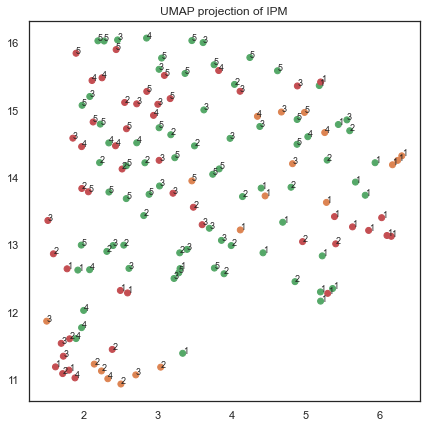

In [128]:
# Standardisation
scaled_array = StandardScaler().fit_transform(ordnum_df)
scaled_df = pd.DataFrame(scaled_array, columns=ordnum_df.columns)

# Mapping
reducer = umap.UMAP(n_neighbors=10, random_state=123, n_components=2, metric="euclidean")
ord_embedding = reducer.fit_transform(scaled_df)

fig, ax = plt.subplots(figsize=(7,7))
xs = ord_embedding[:, 0]
ys = ord_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in ordnum_df['DSS_can_improve_your_productivity_Cat']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')

### Nominal features

/Users/mmarzi/opt/anaconda3/envs/ipm/lib/python3.9/site-packages/umap/umap_.py:1760: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(


Text(0.5, 1.0, 'UMAP projection of IPM')

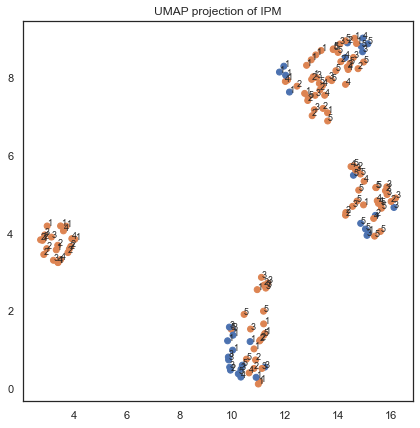

In [130]:
# scaled_array = StandardScaler().fit_transform(nom_df)
# scaled_df = pd.DataFrame(scaled_array, columns=nom_df.columns)

reducer = umap.UMAP(n_neighbors=10, random_state=123, n_components=2, metric="dice")
nom_embedding = reducer.fit_transform(nom_df)

fig, ax = plt.subplots(figsize=(7,7))
xs = nom_embedding[:, 0]
ys = nom_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in nom_df['Already_used_DSS']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')

### Combine nominal and ordinal/numeric feature maps

In [85]:
# combine mappings
intersection_embedding = nom_embedding * ord_embedding
union_embedding = nom_embedding + ord_embedding

Text(0.5, 1.0, 'UMAP projection of IPM')

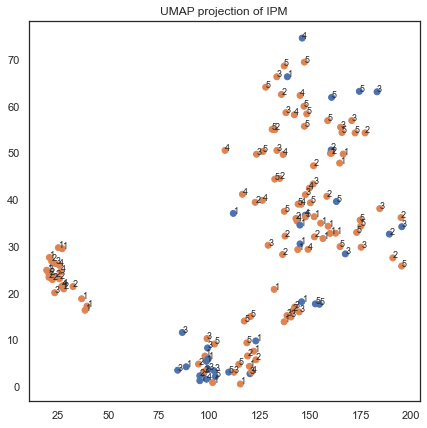

In [86]:
# plot
fig, ax = plt.subplots(figsize=(7,7))
xs = intersection_embedding[:, 0]
ys = intersection_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['Already_used_DSS']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')

Text(0.5, 1.0, 'UMAP projection of IPM')

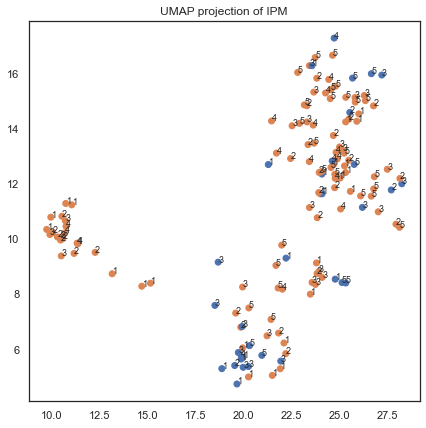

In [87]:
fig, ax = plt.subplots(figsize=(7,7))
xs = union_embedding[:, 0]
ys = union_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['Already_used_DSS']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
xs = intersection_embedding[:, 0]
ys = intersection_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['DSS_can_improve_your_productivity_Cat']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
xs = union_embedding[:, 0]
ys = union_embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['DSS_can_improve_your_productivity_Cat']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')

# CLUSTERING

In [133]:
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

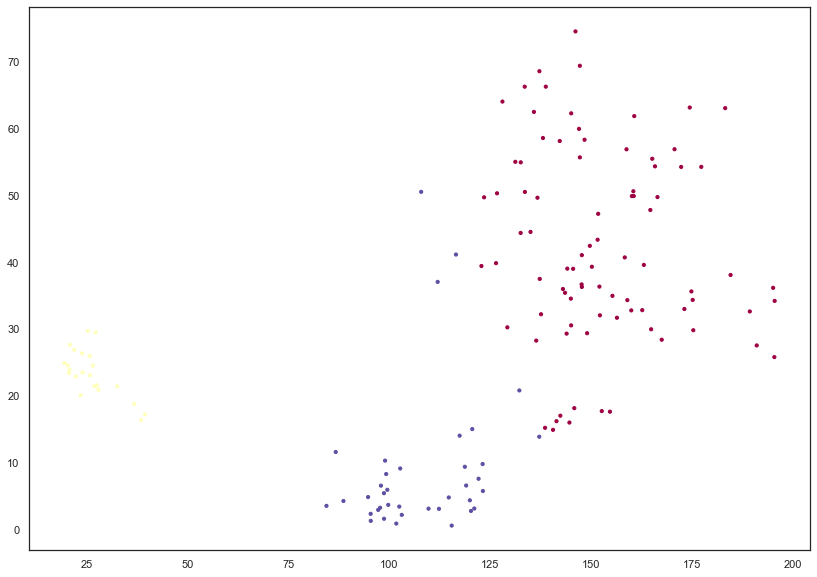

In [191]:
# kmeans
kmeans_labels = cluster.KMeans(n_clusters=3).fit_predict(intersection_embedding)
#kmeans_labels
plt.scatter(intersection_embedding[:, 0], intersection_embedding[:, 1], c=kmeans_labels, s=10, cmap='Spectral')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


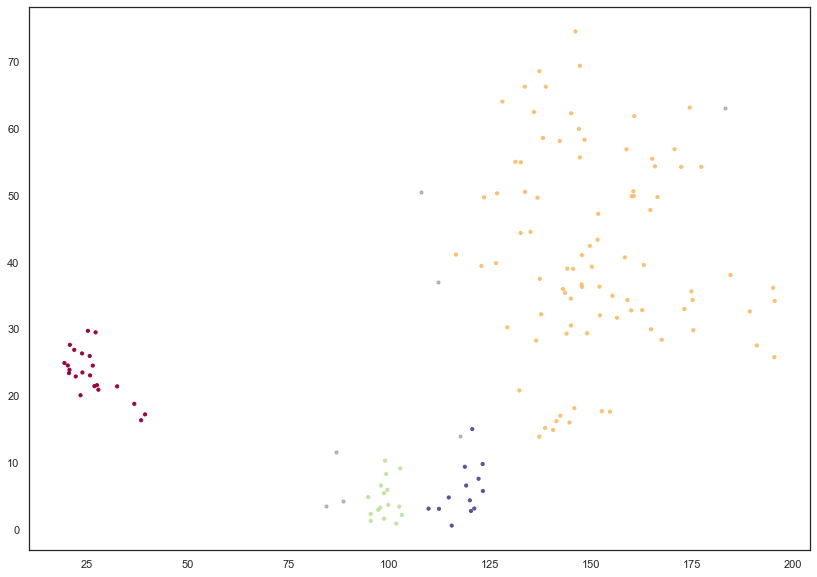

In [194]:
# hdbscan
hdbscan_labels = hdbscan.HDBSCAN(min_samples=3, min_cluster_size=10).fit_predict(intersection_embedding)

clustered = (hdbscan_labels >= 0)
plt.scatter(intersection_embedding[~clustered, 0],
            intersection_embedding[~clustered, 1],
            c=(0.5, 0.5, 0.5),
            s=10,
            alpha=0.5)
plt.scatter(intersection_embedding[clustered, 0],
            intersection_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=10,
            cmap='Spectral')

# Decision trees

In [114]:
from sklearn import tree
target_class = "Already_used_DSS"
X = df_noNaN[[_ for _ in list(ohe_df.columns) if _ not in target_class]]
Y = df_noNaN[target_class]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

[Text(390.6, 407.70000000000005, 'How_do_you_access_DSS_Cat <= 1.5\ngini = 0.352\nsamples = 145\nvalue = [33, 112]'),
 Text(195.3, 135.89999999999998, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(585.9000000000001, 135.89999999999998, 'gini = 0.0\nsamples = 112\nvalue = [0, 112]')]

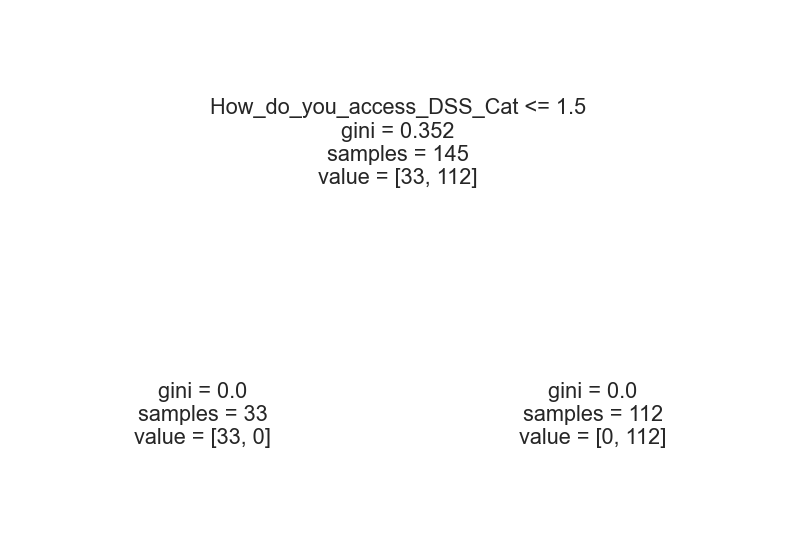

In [126]:
tree.plot_tree(clf, feature_names=list(X.columns)) 

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X, Y)
r = export_text(decision_tree, feature_names=list(X.columns))
print(r)

|--- How_do_you_access_DSS_Cat <= 1.50
|   |--- class: 0.0
|--- How_do_you_access_DSS_Cat >  1.50
|   |--- class: 1.0



In [ ]:
"""Ne morem importat, nek conflict
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("IPM") 
"""

In [ ]:
# old examples

In [ ]:
"""
# df_noNaN = df.fillna(df.mean())
df_noNaN = ohe_df.dropna(how="any")

scaled_array = StandardScaler().fit_transform(df_noNaN)
scaled_df = pd.DataFrame(scaled_array, columns=df_noNaN.columns)

reducer = umap.UMAP(n_neighbors=5, random_state=123, metric='euclidean')
embedding = reducer.fit_transform(scaled_df)

fig, ax = plt.subplots(figsize=(7,7))
xs = embedding[:, 0]
ys = embedding[:, 1] 

ax.scatter(xs, ys, c=[sns.color_palette()[int(x)] for x in df_noNaN['Already_used_DSS']])

for i, val in enumerate(df_noNaN['Income_Cat'].values.tolist()):
    ax.annotate(str(int(val)), (xs[i], ys[i]), fontsize=9)
plt.title('UMAP projection of IPM')
"""

# create dictionary with value mapping

In [ ]:
df["test"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})
df["Age_Cat"] = df["Age_Cat"].replace({4:"več kot 50", 3: "test", 1 : "sdfsdf", 2 : "wsf"})